[{'0000': 0.249975000833322, '0001': 2.49991666778e-05, '0010': 2.49991666778e-05, '0011': 0.249975000833322, '1100': 0.2499999999999998, '1111': 0.2499999999999998}]
{'1100': 0.2499999999999998, '1111': 0.2499999999999998} {'0000': 0.249975000833322, '0001': 2.49991666778e-05, '0010': 2.49991666778e-05, '0011': 0.249975000833322}


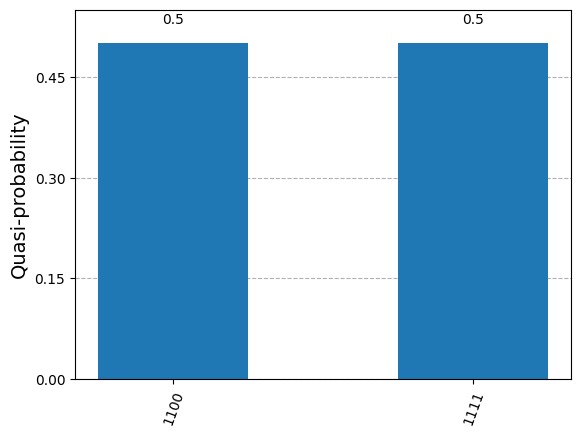

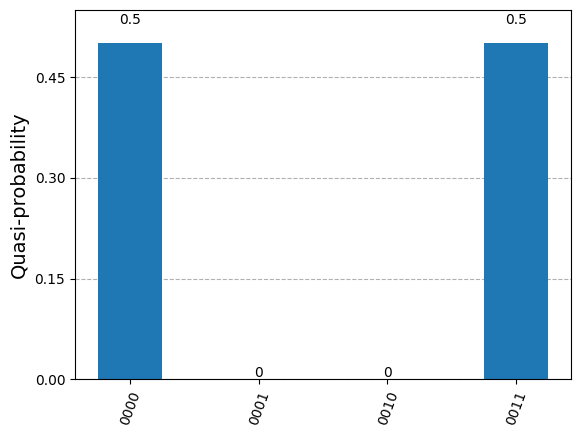

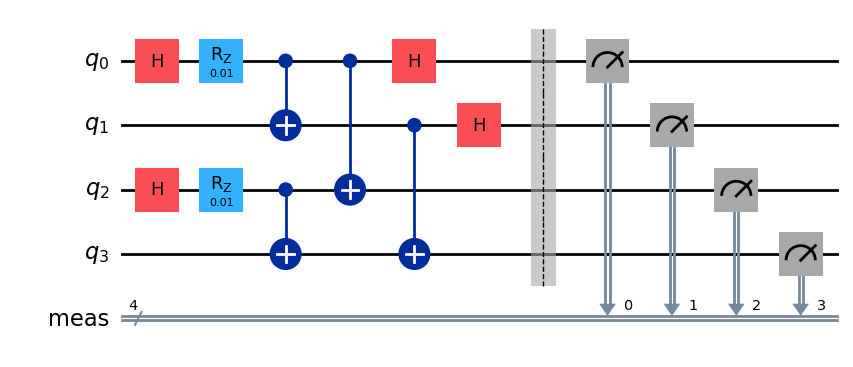

In [1]:

from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram


qc = QuantumCircuit(4)
qc.h([0,2])
qc.rz(0.01,[0,2])
qc.cx([0,2],[1,3])
qc.cx([0,1],[2,3])
qc.h([0,1])
qc.measure_all()
sampler= Sampler()
job= sampler.run(qc)
job_result = job.result()
# print(job_result.quasi_dists)
counts= [q.binary_probabilities() for q in job_result.quasi_dists]
print(counts)
# mixed_measurements = list(*counts)
counts11={}
counts00={}

counts = counts[0]
for key in counts:
    if(key[:2]) == '00':
        counts00[key] = counts[key]
for key in counts:
    if(key[:2]) == '11':
        counts11[key] = counts[key]
        
print(counts11, counts00)

display(plot_histogram(counts11))
display(plot_histogram(counts00))

qc.draw('mpl')